## Flower Classification
In this programming assignment, we will be looking at Flower Classification with a real dataset which has a 'label' for every flower image. The images are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

## Import Modules

In [ ]:
import cv2 # First install your OpenCV-Python if you haven't
import os, pickle
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip ./drive/MyDrive/Winter_22/Adv_ML/flower_train.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./flower_train/rose/5415173021_ec34517d84_n.jpg  
  inflating: ./__MACOSX/flower_train/rose/._5415173021_ec34517d84_n.jpg  
  inflating: ./flower_train/rose/5001856089_4cf8e9c818_n.jpg  
  inflating: ./__MACOSX/flower_train/rose/._5001856089_4cf8e9c818_n.jpg  
  inflating: ./flower_train/rose/7456198272_f5d0c6bc7e_n.jpg  
  inflating: ./__MACOSX/flower_train/rose/._7456198272_f5d0c6bc7e_n.jpg  
  inflating: ./flower_train/rose/2550860627_998a4fc4c1.jpg  
  inflating: ./__MACOSX/flower_train/rose/._2550860627_998a4fc4c1.jpg  
  inflating: ./flower_train/rose/19823402005_2db025dd66_m.jpg  
  inflating: ./__MACOSX/flower_train/rose/._19823402005_2db025dd66_m.jpg  
  inflating: ./flower_train/rose/6255593451_b8a3aa8f7a_m.jpg  
  inflating: ./__MACOSX/flower_train/rose/._6255593451_b8a3aa8f7a_m.jpg  
  inflating: ./flower_train/rose/8181940917_1ac63937d5_n.jpg  
  inflating: ./__MACOSX/flower_train/rose/._8181940917_1ac63937d5_

## Loading the image data

In [ ]:
!rm -rf "/content/flower_train/.DS_Store" #deleting dsstore, not part of da

In [ ]:
train_path = "/content/flower_train"
class_names=os.listdir(train_path)
class_names

['dandelion', 'rose', 'sunflower', 'daisy', 'tulip']

In [ ]:
image_paths=[]

In [ ]:
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [ ]:
for name in class_names:
    dir_=os.path.join(train_path, name)
    print(dir_)
    class_path=img_list(dir_)
    image_paths+=class_path

/content/flower_train/dandelion
/content/flower_train/rose
/content/flower_train/sunflower
/content/flower_train/daisy
/content/flower_train/tulip


In [ ]:
len(image_paths)

3452

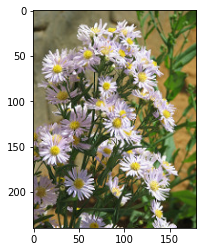

Image Size: (240, 180, 3)
 Image Data Type: <class 'numpy.ndarray'>, uint8
 Max-Min Pixel Value: 255, 0
After normalization, Max-Min Pixel Value: 1.0, 0.0


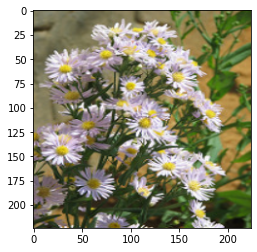

In [ ]:
image_path = "./flower_train/daisy/99306615_739eb94b9e_m.jpg"
sample_image = cv2.imread(image_path) # Image will be B,G,R order.
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_image) # plt.imshow() will assume R, G, B order
plt.show()
print("Image Size: {}\n".format(sample_image.shape),
      "Image Data Type: {}, {}\n".format(type(sample_image), sample_image.dtype),
      "Max-Min Pixel Value: {}, {}".format(sample_image.max(), 
                                           sample_image.min()))

# Basic processing method - resize, normalization
sample_image_resize = cv2.resize(sample_image, (224, 224))
sample_image_norm_resize = sample_image_resize / 255.0
print("After normalization, Max-Min Pixel Value: {}, {}".format(sample_image_norm_resize.max(), 
                                           sample_image_norm_resize.min()))
plt.imshow(sample_image_norm_resize)
plt.show()

## Feature Extraction

For feature extraction, you can use from the most simple statistics of the image, e.g., statistic of colors, histogram of intensity/color values, to many advanced feature extractors/descriptors(shape, texture) in traditional image processing and computer vision, e.g, SIFT(scale-invariant feature transform), SURF(speeded up robust features), LESH(Local energy-based shape histogram), Gabor filters. These feature descriptors are built into Open-CV Python package, you can directly use them

### SIFT feature

In [ ]:
cv2.__version__

'4.1.2'

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7 MB 1.3 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
cv2.__version__

'4.4.0'

In [ ]:
gray = cv2.cvtColor(sample_image_resize, cv2.COLOR_RGB2GRAY)
#print(gray.shape)
sift = cv2.SIFT_create(nfeatures=20) #limit the number of keypoints you want to constrain
#sift = cv2.xfeatures2d.SIFT_create(20)
des_list = []
kp, des = sift.detectAndCompute(gray,None)
 
#print(des[0].shape)
for i in range(len(kp)):
  kp[i].pt, des[i]
  #des_list.append((des)) 
  
 #des_list.append((image_pat,descriptor))

print(des[0].shape)

print("Number of keypoints: {}, Feature Dimension For each keypoints: {}".format(len(kp), des[0].shape))

(128,)
Number of keypoints: 20, Feature Dimension For each keypoints: (128,)


In [ ]:
des_list = []
sift = cv2.SIFT_create(40)

for image in image_paths:
    #im=cv2.imread(image_pat)
    
  sample_image = cv2.imread(image) # Image will be B,G,R order.
  gray = cv2.cvtColor(sample_image, cv2.COLOR_RGB2GRAY)
  sample_image_resize = cv2.resize(sample_image, (224, 224))
    #sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)#

    # Basic processing method - resize, normalization
    #sample_image_norm_resize = sample_image_resize / 255.0
  imgUMat = np.float32(sample_image_resize)
    
   # sift = cv2.SIFT_create(nfeatures=40)
  kp, des = sift.detectAndCompute(gray,None)
  des_list.append((image,des))
print(des_list)

[('/content/flower_train/dandelion/17570530696_6a497298ee_n.jpg', array([[ 13.,   6.,   2., ...,  12.,   1.,  15.],
       [ 35.,  10.,  43., ...,   2.,   8.,  35.],
       [ 36.,  82., 112., ...,  42.,  67.,   6.],
       ...,
       [  2.,   5.,  16., ...,  22.,  25.,  47.],
       [ 22.,  76.,  15., ...,   1.,   0.,   0.],
       [ 21.,   2.,   0., ...,   4.,   2.,  20.]], dtype=float32)), ('/content/flower_train/dandelion/4944731313_023a0508fd_n.jpg', array([[ 2., 14., 63., ...,  7., 17., 10.],
       [ 3., 13., 31., ...,  5.,  6.,  0.],
       [ 2., 70.,  4., ...,  1., 26., 14.],
       ...,
       [ 1.,  1.,  3., ..., 68.,  1.,  5.],
       [ 1., 14.,  1., ...,  0.,  0., 23.],
       [ 7., 66., 88., ...,  0.,  0.,  1.]], dtype=float32)), ('/content/flower_train/dandelion/3517492544_0fd3ed6a66_m.jpg', array([[28., 21., 34., ...,  3.,  5.,  3.],
       [ 9.,  0.,  0., ...,  0.,  0.,  1.],
       [ 2.,  2.,  3., ..., 13., 15., 20.],
       ...,
       [33., 31., 13., ..., 38., 15., 

In [ ]:
# some checks on descriptor list and analysing. np arrays
print(des_list[0])
np.argmin(np.linalg.norm(des_list[0][1][39] - centres, axis=1))

('/content/flower_train/rose/17158274118_00ec99a23c.jpg', array([[  7.,  19.,  28., ...,   0.,   0.,   0.],
       [113.,   1.,   0., ...,   0.,   4.,  15.],
       [  1.,   0.,   0., ...,   3.,   1.,   0.],
       ...,
       [ 10.,   6.,   2., ...,   0.,   0.,   0.],
       [118.,  11.,   3., ...,  32.,   7.,   0.],
       [  3.,   3.,   4., ...,   0.,   0.,   0.]], dtype=float32))


20

In [ ]:
descriptors = des_list[0][1]
for image_path, descriptor in des_list[0:]:
    descriptors = np.vstack((descriptors, descriptor)) 

In [ ]:
descriptors.shape

(138758, 128)

In [ ]:
nk= descriptors.shape[0] 
nk
#total number of descriptors across all images in the training set

138758

In [ ]:
len(descriptors)

138758

In [ ]:
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq

In [ ]:
k = 150
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centres = cv2.kmeans(descriptors, k, None, criteria, 10, flags)

In [ ]:
compactness

10203540753.40332

In [ ]:
len(labels)

138758

In [ ]:
centres.shape

(150, 128)

In [ ]:
len(descriptors)

138758

In [ ]:
from scipy.cluster.vq import vq    

In [ ]:
def bag_of_features(descriptors, centres, k = 150):
  vec = np.zeros((1, k))
  for i in range(descriptors.shape[0]):
    feat = descriptors[i]
    diff = np.tile(feat, (k, 1)) - centres
    dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
    idx_dist = dist.argsort()
    idx = idx_dist[0]
    vec[0][idx] += 1
  return vec

In [ ]:
labels = []
vec = []

for file, descriptors in des_list:
    img_vec = bag_of_features(descriptors, centres, k)
    vec.append(img_vec)
    labels.append(file.split('/')[3])
labels = np.array(labels).reshape(-1,1)

In [ ]:
X = np.vstack(vec) # all images features 

In [ ]:
X.shape

(3452, 150)

In [ ]:
labels

array([['dandelion'],
       ['dandelion'],
       ['dandelion'],
       ...,
       ['tulip'],
       ['tulip'],
       ['tulip']], dtype='<U9')

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# enc.fit(labels)
# y = enc.transform(labels).toarray() # all images labels

In [ ]:
#y.shape

(3452, 5)

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
y_labels = label_encoder.fit_transform(labels)
y_labels = np.array(y_labels).reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_labels.shape

(3452, 1)

In [ ]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

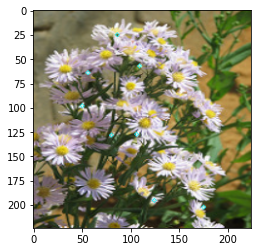

In [ ]:
kp, des = sift.detectAndCompute(gray,None)
img=draw_keypoints(sample_image_norm_resize,kp)

In [ ]:
# # Perform Tf-Idf vectorization
# nbr_occurences = np.sum( (im_features > 0) * 1, axis = 0)
# idf = np.array(np.log((1.0*len(image_path)+1) / (1.0*nbr_occurences + 1)), 'float32')

# 1) SVM

In [ ]:
from sklearn.preprocessing import StandardScaler

# standardising X datapoints
scaler_train = StandardScaler()
scaler_train.fit(X) # computes mean and std for every column, dont do for test
X_scaled = scaler_train.transform(X)

In [ ]:
# standardising Y datapoints
#y = y.reshape(-1,1)
scaler_ytrain = StandardScaler()
scaler_ytrain.fit(y_labels)
y_scaled = scaler_ytrain.transform(y_labels) #normalised y values

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
  '''
  Splitting the data formed into test and split data and training the 
  SVM Classifier.
  '''

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_labels, test_size=0.2)
clf = SVC()
clf.fit(X_train, y_train)
preds = clf.predict(X_val)
acc = accuracy_score(y_val, preds)
conf_mat = confusion_matrix(y_val, preds)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Training Accuracy with SVM is:",acc)

Training Accuracy with SVM is: 0.4761215629522431


In [ ]:
conf_mat

array([[70, 12,  5, 16, 19],
       [13, 93,  4, 13, 36],
       [ 8, 26, 34,  9, 57],
       [23, 17,  7, 48, 30],
       [ 6, 23, 23, 15, 84]])

# Testing

In [ ]:
!unzip ./drive/MyDrive/Winter_22/Adv_ML/flower_test-1.zip -d ./

Archive:  ./drive/MyDrive/Winter_22/Adv_ML/flower_test-1.zip
   creating: ./flower_test/
  inflating: ./flower_test/.DS_Store  
  inflating: ./__MACOSX/flower_test/._.DS_Store  
   creating: ./flower_test/daisy/
   creating: ./flower_test/rose/
   creating: ./flower_test/tulip/
   creating: ./flower_test/dandelion/
   creating: ./flower_test/sunflower/
  inflating: ./flower_test/daisy/476857510_d2b30175de_n.jpg  
  inflating: ./__MACOSX/flower_test/daisy/._476857510_d2b30175de_n.jpg  
  inflating: ./flower_test/daisy/7320089276_87b544e341.jpg  
  inflating: ./__MACOSX/flower_test/daisy/._7320089276_87b544e341.jpg  
  inflating: ./flower_test/daisy/3706420943_66f3214862_n.jpg  
  inflating: ./__MACOSX/flower_test/daisy/._3706420943_66f3214862_n.jpg  
  inflating: ./flower_test/daisy/3474942718_c418dae6f1.jpg  
  inflating: ./__MACOSX/flower_test/daisy/._3474942718_c418dae6f1.jpg  
  inflating: ./flower_test/daisy/705422469_ffa28c566d.jpg  
  inflating: ./__MACOSX/flower_test/daisy/._705

In [ ]:
!rm -rf "/content/flower_test/.DS_Store" #deleting dsstore, not part of da

In [ ]:
test_path = "/content/flower_test"
test_class_names=os.listdir(test_path)
test_class_names

['dandelion', 'rose', 'sunflower', 'daisy', 'tulip']

In [ ]:
test_image_paths = []
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

for name in class_names:
    dir_=os.path.join(test_path , name)
    print(dir_)
    class_path = img_list(dir_)
    test_image_paths +=class_path

/content/flower_test/dandelion
/content/flower_test/rose
/content/flower_test/sunflower
/content/flower_test/daisy
/content/flower_test/tulip


In [ ]:
len(test_image_paths)

865

In [ ]:
des_list_test = []
sift = cv2.SIFT_create(40)

for image in test_image_paths:
    #im=cv2.imread(image_pat)
    
  sample_image = cv2.imread(image) # Image will be B,G,R order.
  gray = cv2.cvtColor(sample_image, cv2.COLOR_RGB2GRAY)
  sample_image_resize = cv2.resize(sample_image, (224, 224))
    #sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)#

    # Basic processing method - resize, normalization
    #sample_image_norm_resize = sample_image_resize / 255.0
  imgUMat = np.float32(sample_image_resize)
    
   # sift = cv2.SIFT_create(nfeatures=40)
  kp_test, des_test = sift.detectAndCompute(gray,None)
  des_list_test.append((image,des_test))
print(des_list_test)

[('/content/flower_test/dandelion/2039797043_d5b709f275_n.jpg', array([[  0.,   1.,   7., ...,   7.,   1.,   1.],
       [  3.,   0.,   0., ...,   2.,   0.,   0.],
       [  4.,   1.,   2., ...,   0.,   0.,   0.],
       ...,
       [  9.,  13., 113., ...,   0.,   0.,  25.],
       [ 10.,  33.,   1., ...,   0.,   0.,  16.],
       [ 25.,  25.,   9., ...,   1.,   0.,   1.]], dtype=float32)), ('/content/flower_test/dandelion/14053397367_75cba846eb_n.jpg', array([[91.,  3.,  1., ..., 45., 39., 13.],
       [25.,  3., 22., ...,  3.,  2., 19.],
       [44., 30.,  6., ...,  8., 86., 10.],
       ...,
       [16.,  5.,  6., ...,  3.,  7.,  7.],
       [ 0.,  5., 14., ...,  3., 31., 11.],
       [85., 48.,  2., ..., 17.,  2.,  9.]], dtype=float32)), ('/content/flower_test/dandelion/6019234426_d25ea1230a_m.jpg', array([[ 8., 14.,  1., ...,  0.,  2., 28.],
       [64., 10.,  1., ...,  0.,  0.,  3.],
       [ 0., 11., 79., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [ ]:
descriptors_test = des_list_test[0][1]
for image_path, descriptor in des_list_test[0:]:
    if descriptor is not None:
        descriptors_test = np.vstack((descriptors_test, descriptor))
descriptors_test.shape

(34812, 128)

In [ ]:
def bag_of_features_test(descriptors_test, centres, k = 150):
  vec = np.zeros((1, k))
  for i in range(descriptors_test.shape[0]):
    feat = descriptors_test[i]
    diff = np.tile(feat, (k, 1)) - centres
    dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
    idx_dist = dist.argsort()
    idx = idx_dist[0]
    vec[0][idx] += 1
  return vec

In [ ]:
labels_test = []
vec_test = []

for file, descriptors in des_list_test:
    if descriptors is not None:
      img_vec = bag_of_features_test(descriptors, centres, k)
      vec_test.append(img_vec)
      labels_test.append(file.split('/')[3])
labels_test = np.array(labels_test).reshape(-1,1)

In [ ]:
X_test = np.vstack(vec_test) # all images features 

In [ ]:
X_test.shape

(864, 150)

In [ ]:
labels_test.shape

(864, 1)

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder_test= preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
y_labels_test = label_encoder.fit_transform(labels_test)
y_labels_test = np.array(y_labels_test).reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_labels_test.shape

(864, 1)

In [ ]:
# Prediction on test data
preds_test = clf.predict(X_test)
acc_test = accuracy_score(y_labels_test, preds_test)
conf_mat_test = confusion_matrix(y_labels_test, preds_test)

In [ ]:
print("Testing Accuracy with SVM is:",acc_test)

Testing Accuracy with SVM is: 0.4664351851851852


In [ ]:
conf_mat_test

array([[ 85,  11,  14,  13,  30],
       [ 17,  84,  28,  22,  60],
       [  3,  16,  55,  10,  72],
       [ 12,  15,  16,  54,  50],
       [  3,  14,  37,  18, 125]])

# 2) Random Forest Training

In [ ]:
#Train an algorithm to discriminate vectors corresponding to positive and negative training images
from sklearn.ensemble import RandomForestClassifier
clf_rand = RandomForestClassifier(n_estimators = 100, random_state=30)
clf_rand.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(random_state=30)

In [ ]:
preds_rand_train = clf_rand.predict(X_val)
acc_rand_train = accuracy_score(y_val, preds_rand_train)
conf_mat_rand_train = confusion_matrix(y_val, preds_rand_train)

In [ ]:
print("Training Accuracy on Random Forest:",acc_rand_train)

Training Accuracy on Random Forest: 0.42257597684515197


In [ ]:
print("Confusion matrix for Random Forest on train data:")
conf_mat_rand_train

Confusion matrix for Random Forest on train data:


array([[69, 19,  5, 10, 19],
       [16, 98,  8,  4, 33],
       [13, 34, 22,  7, 58],
       [24, 39,  3, 28, 31],
       [ 8, 37, 25,  6, 75]])

Testing on RF

In [ ]:
# Prediction on test data
preds_rand_test = clf_rand.predict(X_test)
acc_rand_test = accuracy_score(y_labels_test, preds_rand_test)
conf_mat_rand_test = confusion_matrix(y_labels_test, preds_rand_test)

In [ ]:
print("Testing Accuracy on Random Forest:",acc_rand_test)

Testing Accuracy on Random Forest: 0.4386574074074074


In [ ]:
print("Confusion matrix for Random Forest on test data:")
conf_mat_rand_test

Confusion matrix for Random Forest on test data:


array([[ 90,  35,   7,   5,  16],
       [ 31, 123,  11,   9,  37],
       [ 14,  35,  26,   8,  73],
       [ 25,  40,   6,  36,  40],
       [ 15,  46,  27,   5, 104]])

# 3) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_decstree = DecisionTreeClassifier(max_depth=5)
clf_decstree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
preds_decstree_train = clf_decstree.predict(X_val)
acc_decstree_train = accuracy_score(y_val, preds_decstree_train)
conf_mat_decstree_train = confusion_matrix(y_val, preds_decstree_train)

In [ ]:
print("Training Accuracy on Decision Tree:",acc_decstree_train)

Training Accuracy on Decision Tree: 0.3314037626628075


In [ ]:
print("Confusion matrix for Decision Tree on train data:")
conf_mat_decstree_train

Confusion matrix for Decision Tree on train data:


array([[41, 42,  7, 11, 21],
       [16, 90,  1, 19, 33],
       [11, 60,  6, 12, 45],
       [13, 54,  1, 37, 20],
       [ 9, 64,  7, 16, 55]])

Testing on Decision tree

In [ ]:
# Prediction on test data
preds_decstree_test = clf_decstree .predict(X_test)
acc_decstree_test = accuracy_score(y_labels_test, preds_decstree_test)
conf_mat_decstree_test = confusion_matrix(y_labels_test, preds_decstree_test)

In [ ]:
print("Testing Accuracy on Decision Tree:",acc_decstree_test)

Testing Accuracy on Decision Tree: 0.3402777777777778


In [ ]:
print("Confusion matrix for Decision Tree on test data:")
conf_mat_decstree_test

Confusion matrix for Decision Tree on test data:


array([[ 85,  51,   4,   6,   7],
       [ 45, 102,  17,  22,  25],
       [ 20,  54,  25,  11,  46],
       [ 30,  55,   5,  35,  22],
       [ 46,  80,  14,  10,  47]])

# 4) Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
preds_gnb_train = clf_gnb.predict(X_val)
acc_gnb_train = accuracy_score(y_val, preds_gnb_train)
conf_mat_gnb_train = confusion_matrix(y_val, preds_gnb_train)

In [ ]:
print("Training Accuracy with Gaussian Naive Bayes :",acc_gnb_train)

Training Accuracy with Gaussian Naive Bayes : 0.4370477568740955


In [ ]:
print("Confusion matrix fo Gaussian Naive Bayes on train data:")
conf_mat_gnb_train

Confusion matrix fo Gaussian Naive Bayes on train data:


array([[78, 12,  5, 10, 17],
       [21, 67, 11, 18, 42],
       [13, 20, 47, 10, 44],
       [26, 12,  9, 44, 34],
       [10, 21, 37, 17, 66]])

Testing on Gaussian Naive Bayes

In [ ]:
# Prediction on test data
preds_gnb_test = clf_gnb.predict(X_test)
acc_gnb_test = accuracy_score(y_labels_test, preds_gnb_test)
conf_mat_gnb_test = confusion_matrix(y_labels_test, preds_gnb_test)

In [ ]:
print("Testing Accuracy on Gaussian Naive Bayes:",acc_gnb_test)

Testing Accuracy on Gaussian Naive Bayes: 0.44675925925925924


In [ ]:
print("Confusion matrix for Gaussian Naive Bayes on test data:")
conf_mat_gnb_test

Confusion matrix for Gaussian Naive Bayes on test data:


array([[ 84,  20,  16,  11,  22],
       [ 22,  82,  40,  11,  56],
       [  5,  15,  75,   7,  54],
       [ 23,  25,  19,  32,  48],
       [  5,  19,  47,  13, 113]])

# Late Fusion

In [ ]:

print("Prediction labels across Test sets and various ML models\n")

print("Prediction labels with SVM:")
print(preds_test)
print("\n******************************************************\n")

print("Prediction labels with Random Forest:")
print(preds_rand_test)
print("\n******************************************************\n")

print("Prediction labels with Decision Tree:")
print(preds_decstree_test)
print("\n******************************************************\n")

print("Prediction labels with Gaussian Naive Bayes")
print(preds_gnb_test)

Prediction labels across Test sets and various ML models

Prediction labels with SVM:
[4 4 1 0 1 1 1 1 1 1 4 1 1 1 0 3 4 2 3 1 4 2 1 3 4 2 1 4 2 1 1 2 4 0 1 1 1
 4 2 4 4 4 3 1 1 1 1 1 2 4 1 4 0 1 3 1 4 1 4 2 2 1 3 0 2 4 0 4 1 0 3 1 0 1
 4 1 1 3 1 1 4 1 4 2 4 1 1 2 3 0 4 0 1 4 1 1 3 4 1 2 4 1 4 1 1 3 1 3 4 1 4
 3 1 1 4 4 3 1 1 0 1 0 4 4 2 2 4 2 2 4 3 4 1 1 1 4 2 4 1 4 3 4 4 1 1 2 2 1
 1 1 1 4 4 2 0 4 4 1 3 1 4 1 4 2 3 3 1 2 4 1 0 1 1 1 3 1 2 4 0 1 1 3 2 1 2
 1 4 0 3 1 4 1 1 1 1 4 2 4 1 4 4 1 4 1 0 4 4 4 4 1 2 4 1 4 4 0 4 3 4 2 4 4
 4 2 4 1 4 4 4 4 4 3 4 4 4 4 2 2 4 2 1 1 4 4 1 2 4 4 4 1 4 2 2 2 4 2 4 2 2
 2 3 2 4 2 4 4 2 4 0 4 4 2 4 2 4 2 2 4 2 2 3 4 2 4 4 2 4 1 1 2 2 3 4 4 1 2
 2 4 2 2 1 2 2 2 4 4 4 2 0 4 2 4 4 3 2 1 2 2 4 2 2 4 4 2 4 4 4 2 4 4 4 4 2
 2 2 4 4 2 1 2 1 3 2 2 2 3 2 4 4 4 4 4 4 2 3 3 4 1 4 1 4 2 1 2 4 4 2 3 3 4
 3 3 4 0 4 3 1 4 0 3 2 4 4 3 4 3 3 2 3 4 3 0 1 4 4 0 1 2 3 3 1 1 3 1 4 3 3
 2 4 3 4 1 3 3 2 2 4 3 3 4 1 1 3 0 4 1 4 4 3 3 4 3 4 4 3 4 4 3 0 4 2 1 3 4
 3 3 3 3 4 2 4

In [ ]:
model_preds = [preds_test,preds_rand_test,preds_decstree_test,preds_gnb_test]
num_test_samples = preds_test.shape[0]
best_preds = []
for test_sample_idx in range(num_test_samples):
    pd1 = preds_test[test_sample_idx]
    pd2 = preds_rand_test[test_sample_idx]
    pd3 = preds_decstree_test[test_sample_idx]
    pd4 = preds_gnb_test[test_sample_idx]
    preds = np.array([pd1, pd2, pd3, pd4])
    u, c = np.unique(preds, return_counts = True)
    best_pred = u[c == c.max()]
    best_preds.append(best_pred[0])

best_preds    


[1,
 4,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 3,
 4,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 4,
 4,
 0,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 4,
 0,
 1,
 1,
 0,
 3,
 1,
 0,
 1,
 4,
 1,
 1,
 1,
 1,
 0,
 4,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 0,
 1,
 4,
 1,
 1,
 3,
 4,
 1,
 2,
 4,
 1,
 4,
 1,
 1,
 3,
 1,
 1,
 4,
 1,
 4,
 4,
 1,
 1,
 4,
 4,
 0,
 1,
 1,
 0,
 1,
 0,
 4,
 1,
 2,
 2,
 0,
 1,
 1,
 4,
 3,
 4,
 1,
 1,
 1,
 3,
 4,
 1,
 1,
 4,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 0,
 4,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 4,
 1,
 2,
 1,
 2,
 4,
 1,
 0,
 1,
 1,
 1,
 3,
 0,
 2,
 1,
 0,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 4,
 0,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 4,
 4,
 1,
 1,
 1,
 1,
 0,
 1,
 4,
 0,
 0,
 4,
 3,
 4,
 2,
 1,
 4,
 4,
 1,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 1,
 4,
 2,
 2,
 4,
 2,
 1,
 1,
 2,
 4,
 1,
 2,
 4,
 4,
 4,
 1,


Late fusion helped us to get the majority vote from predictions of all the models. 
When there was a tie between the number of majority predictions, I have randomly chosen one among the predictions.

# Hog features

I have tried to play with other features but due to time shortage couldn't try more
Note : there was no communication from TA's end to mandatorily try this, so I just tried it for my onown understanding.


In [ ]:
from skimage.feature import hog

for image in image_paths:
  hog_pixels_per_cell=16
  hog_cells_per_block=1
  nbins=255
  data=[]

  sample_image = cv2.imread(image) 
  gray = cv2.cvtColor(sample_image, cv2.COLOR_RGB2GRAY)
  sample_image_resize = cv2.resize(sample_image, (224, 224))
  
  hog_image = hog(gray, orientations=8, pixels_per_cell=(hog_pixels_per_cell, hog_pixels_per_cell),cells_per_block=(hog_cells_per_block, hog_cells_per_block), feature_vector=True)
  ch1 = np.histogram(sample_image_resize[:,:,0], bins = nbins, range = (0, 256))[0]
  ch2 = np.histogram(sample_image_resize[:,:,1], bins = nbins, range = (0, 256))[0]
  ch3 = np.histogram(sample_image_resize[:,:,2], bins = nbins, range = (0, 256))[0]
  color = np.hstack((ch1, ch2, ch3))
  

In [ ]:
hog_image.shape

(2080,)

In [ ]:
hog_image = hog_image.reshape(-1, 1)

In [ ]:
hog_image.shape

(1800, 1)

In [ ]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC(random_state = 42)

In [ ]:
# Fit to the selected model
model_svc.fit(hog_image, y_train)

### Color Histogram feature

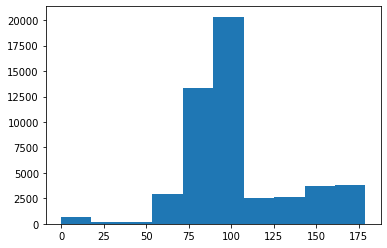

In [ ]:
H = cv2.cvtColor(sample_image_resize, cv2.COLOR_BGR2HSV)[...,0]
hue_dist, bins = np.histogram(H, bins=255)
plt.hist(H.reshape((-1,)))
plt.show()

### Process the features into what you can fit into ML models
Especially for feature like SIFT, you want to reduce dimensionality since (num_keypoints, 128) is very large. 

First you might want to limit the number of keypoints to extract. 

Also, you want to reduce the dims by a method called `bag of visual words`, where you treat each 128-d vector as a visual word, and assign it a label. 

However, the vector space is continuous unlike the vocabularies where the representation is discrete. So in this case, what you want to do is to
discretize the 128-d space by some clustering method, e.g, KMeans, (you need to choose num_clusters yourself). 

After you perform clustering using all your training data of size(num_images x num_keypoints, 128), each of these vector will have a cluster label ranging from 0 - num_clusters - 1, then you can treat them as so-called 'visual word'. 

For each image, now your representation becomes a bag of visual words, quite similar to the representation of the document.

In [ ]:
## Steps to turn SIFT features into trainable features

## Gather training descriptors

## Perform clustering

## Assign Label to train data,validation & test data 

## Bag of visual words representation


## Fit into your ML models
Try a variable list of classical ML models you've learned so far in class to perform this multi-classification, i.e., 
RandomForest, Multinomial Logistic Regression(LR for multi-class scenario), and also some others classical approach
like SVM(kernel), NaiveBayes etc. 

Compare the models you've tried on the classification accuracy on test data, plot the confusion matrix. 

You can experiment on a large vareity of image features not limited to SIFT introduced here, but SIFT can be a decent baseline for you to work on. In this assignment, we do not expect you to be able to achieve high accuracy on the test result since image classification using traditional feature extraction is quited limited. 

When we later introduce Deep Neural Nets and especially CNN(Convolutional Neural Network), you will easily achieve a high performance. 

The purpose of this assignment is let you understand and explore how you can do feature engineering in image domain and let you learn some fundamentals of digital image processing.